In [1]:
# En este notebook aprenderemos a:
# Leer los datos con PySpark
# Realizar transformaciones
# Guardar los dataframes como tablas Delta
# Crear un modelo estrella para análisis

#Configuración inicial y verificación del entorno
# Este comando verifica que estamos en el entorno correcto de Fabric

import pyspark.sql.functions as F
from pyspark.sql.types import *
from notebookutils import mssparkutils
import pandas as pd

# Verificar versión de Spark
print(f"Versión de Spark: {spark.version}")

StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 3, Finished, Available, Finished)

Versión de Spark: 3.5.1.5.4.20250914.1


In [2]:
# Crear estructura de carpetas en el lakehouse
# Este comando crea las carpetas necesarias en el lakehouse para almacenar nuestros archivos

try:
    # Crear carpetas para datos brutos y procesados
    mssparkutils.fs.mkdirs("Files/silver")
    mssparkutils.fs.mkdirs("Files/gold")
    mssparkutils.fs.mkdirs("Files/bronze")
    print("✅ Estructura de carpetas creada correctamente")
except Exception as e:
    print(f"Error al crear carpetas: {str(e)}")

StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 4, Finished, Available, Finished)

✅ Estructura de carpetas creada correctamente


In [4]:

# Definición de esquemas para mejor control de los datos
# Definimos los esquemas de nuestros dataframes para asegurar tipos de datos correctos

# 1 Esquema para brokers
#BrokerID,BrokerName,Region,Email
schema_broker = StructType([
    StructField("BrokerID", IntegerType(), False),
    StructField("BrokerName", StringType(), True),
    StructField("Region", StringType(), True),
    StructField("Email", StringType(), True)
])

# 2 Esquema para campaigns
#CampaignID,Channel,CampaignName,StartDate,EndDate,BudgetUSD 
schema_campaign = StructType([
    StructField("CampaignID", IntegerType(), False),
    StructField("Channel", StringType(), True),
    StructField("CampaignName", StringType(), True),
    StructField("StartDate", DateType(), False),
    StructField("EndDate", DateType(), False),
    StructField("BudgetUSD", IntegerType(), False),
])

# 3 Esquema para client
#ClientID,FirstName,LastName,Email,Region
schema_client = StructType([
    StructField("ClientID", IntegerType(), False),
    StructField("FirstName", StringType(), True),
    StructField("LastName", StringType(), True),
    StructField("Email", StringType(), True),
    StructField("Region", StringType(), True)
])

# 4 Esquema para lead
#LeadID,ClientID,PropertyID,CampaignID,LeadDate,LeadSource
schema_lead = StructType([
    StructField("LeadID", IntegerType(), False),
    StructField("ClientID", IntegerType(), False),
    StructField("PropertyID", IntegerType(), False),
    StructField("CampaignID", IntegerType(), False), 
    StructField("LeadDate", DateType(), False),
    StructField("LeadSource", StringType(), True)
])

# 5 Esquema para project
#ProjectID,ProjectName,City,Region,LaunchYear,Status
schema_project = StructType([
    StructField("ProjectID", IntegerType(), False),
    StructField("ProjectName", StringType(), True),
    StructField("City", StringType(), True),
    StructField("Region", StringType(), True),
    StructField("LaunchYear", IntegerType(), True),
    StructField("Status", StringType(), True)
])

# 6 Esquema para property
#PropertyID,ProjectID,PropertyType,Size_m2,Bedrooms,Bathrooms,ListPriceUSD,AvailabilityStatus
#1000,118,Apartment,142,3,1,94661,Available
schema_propertie = StructType([
    StructField("PropertyID", IntegerType(), False),
    StructField("ProjectID", IntegerType(), False),
    StructField("PropertyType", StringType(), True),
    StructField("Size_m2", IntegerType(), True),
    StructField("Bedrooms", IntegerType(), True),
    StructField("Bathrooms", IntegerType(), True),
    StructField("ListPriceUSD", IntegerType(), True),
    StructField("AvailabilityStatus", StringType(), True)
])

# 7 Esquema para sales
# SaleID,PropertyID,ClientID,BrokerID,SaleDate,SalePriceUSD
# 6000,1006,3029,2013,2025-06-16,127960
schema_sale = StructType([
    StructField("SaleID", IntegerType(), False),
    StructField("PropertyID", IntegerType(), False),
    StructField("ClientID", IntegerType(), False),
    StructField("BrokerID", IntegerType(), False),
    StructField("SaleDate", DateType(), False),
    StructField("SalePriceUSD", IntegerType(), True)
])

print("✅ Esquemas definidos correctamente")


StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 5, Finished, Available, Finished)

✅ Esquemas definidos correctamente


In [6]:
# Leer los archivos CSV con los esquemas definidos
# Este comando lee los archivos CSV utilizando los esquemas definidos anteriormente

try:
    # Leer archivo de brokers
    df_brokers = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_broker) \
        .load("Files/raw/brokers.csv")
    
    # Leer archivo de campaigns
    df_campaigns = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_campaign) \
        .load("Files/raw/campaigns.csv")
    
    # Leer archivo de clients
    df_clients = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_client) \
        .load("Files/raw/clients.csv")
    
   # Leer archivo de leads
    df_leads = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_lead) \
        .load("Files/raw/leads.csv")

    
    # Leer archivo de projects
    df_projects = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_project) \
        .load("Files/raw/projects.csv")

    # Leer archivo de properties
    df_properties = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_propertie) \
        .load("Files/raw/properties.csv")

    # Leer archivo de sales
    df_sales = spark.read.format("csv") \
        .option("header", "true") \
        .schema(schema_sale) \
        .load("Files/raw/sales.csv")
    

    print("✅ Archivos CSV leídos correctamente")
except Exception as e:
    print(f"Error al leer archivos: {str(e)}")

StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 7, Finished, Available, Finished)

✅ Archivos CSV leídos correctamente


In [8]:

# Exploración de los datos
# Mostramos una vista previa de los datos cargados

print("Vista previa de los datos de df_brokers:")
display(df_brokers.limit(5))

print("Vista previa de los datos de df_campaigns:")
display(df_campaigns.limit(5))

print("Vista previa de los datos de df_clients:")
display(df_clients.limit(5))

print("Vista previa de los datos de df_leads:")
display(df_leads.limit(5))

print("Vista previa de los datos de df_projects:")
display(df_projects.limit(5))

print("Vista previa de los datos de df_properties:")
display(df_properties.limit(5))

print("Vista previa de los datos de df_sales:")
display(df_sales.limit(5))


StatementMeta(, 58d857c6-b439-4baf-b456-f2aa0866ff86, 10, Finished, Available, Finished)

Vista previa de los datos de df_brokers:


SynapseWidget(Synapse.DataFrame, 2b7288e6-216d-47b9-8735-fc307a0387f3)

Vista previa de los datos de df_campaigns:


SynapseWidget(Synapse.DataFrame, 713e15d2-c0bc-4d00-a8aa-606d7dc6a85f)

Vista previa de los datos de df_clients:


SynapseWidget(Synapse.DataFrame, 87c52355-1208-414a-8df1-caa65d226668)

Vista previa de los datos de df_leads:


SynapseWidget(Synapse.DataFrame, ffb0dee4-07f4-47c8-bcf6-c95ba0f815c8)

Vista previa de los datos de df_projects:


SynapseWidget(Synapse.DataFrame, 45b8e340-2468-40d6-9ee2-14b658f54388)

Vista previa de los datos de df_properties:


SynapseWidget(Synapse.DataFrame, 3bdf72ec-e1ad-481e-bfcc-7394e55b620c)

Vista previa de los datos de df_sales:


SynapseWidget(Synapse.DataFrame, a6ca8466-cfbd-441b-9004-8d8b268918f3)

In [13]:

# Realizar transformaciones en los dataframes
# Aplicamos transformaciones básicas para mejorar la calidad de los datos


# Transformación de brokers: Comision Broker por Region
df_brokers_procesado = df_brokers.withColumn(
"BrokerCommission",
 F.when(F.col("Region") == "Caribe", 0.25)
 .when(F.col("Region") == "Andina", 0.24)
 .when(F.col("Region") == "Pacífica", 0.23)
 .otherwise(0.2)
)

# Transformación de clientes: Añadir columna nombre_completo
df_clientes_procesado = df_clients.withColumn(
    "full_name", 
    F.concat(F.col("FirstName"), F.lit(" "), F.col("LastName"))
)

# Transformación de leads: Extraer el año de lead
df_leads_procesado = df_leads.withColumn(
    "YearLead", 
    F.year(F.col("LeadDate"))
)

# Transformación de projects: Año desde lanzamiento del proyecto
df_projects_procesado = df_projects.withColumn(
"YearsSinceLaunch",
F.year(F.current_date()) - F.col("LaunchYear")
)

# Transformación de campaigns: Duración en día de campaña
df_campaign_procesado = df_campaigns.withColumn(
"CampaignDurationDays",
F.datediff(F.col("EndDate") , F.col("StartDate"))
)
# Estado de campaña
df_campaign_procesado = df_campaign_procesado.withColumn(
"CampaignStatus",
F.when(F.col("EndDate") < F.current_date(), "Finalizada")
 .when(F.col("StartDate") > F.current_date(), "Planificada")
 .otherwise("Vigente")
)

# Transformación de properties: Precio de propierdad por M2 y precio de propiedad por categoria
df_properties_procesado = df_properties.withColumn(
"PriceForM2",
F.round(F.col("ListPriceUSD") / F.col("Size_m2"),2)
)

df_properties_procesado = df_properties_procesado.withColumn(
"PriceCategory",
F.when(F.col("ListPriceUSD") < 100000, "Economica")
 .when(F.col("ListPriceUSD") < 300000, "Media")
 .otherwise("Premium")
)

# Transformación de Sales: Extraer mes de venta
df_sales_procesado = df_sales.withColumn(
    "MonthSale", 
    F.month(F.col("SaleDate"))
)

print("✅ Transformaciones aplicadas correctamente")



StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 8, Finished, Available, Finished)

✅ Transformaciones aplicadas correctamente


In [14]:
# Mostrar ejemplos de las transformaciones

print("Ejemplo de brokers procesados:")
display(df_brokers_procesado.limit(5))

print("Ejemplo de clientes procesados:")
display(df_clientes_procesado.limit(5))

print("Ejemplo de productos procesados:")
display(df_leads_procesado.limit(5))

print("Ejemplo de projects procesados:")
display(df_projects_procesado.limit(5))

print("Ejemplo de campaigns procesados:")
display(df_campaign_procesado.limit(5))

print("Ejemplo de properties procesados:")
display(df_properties_procesado.limit(5))

print("Ejemplo de sales procesados:")
display(df_sales_procesado.limit(5))



StatementMeta(, 58d857c6-b439-4baf-b456-f2aa0866ff86, 16, Finished, Available, Finished)

Ejemplo de brokers procesados:


SynapseWidget(Synapse.DataFrame, 3f490d89-734b-4e91-8c9c-cc6942116c33)

Ejemplo de clientes procesados:


SynapseWidget(Synapse.DataFrame, 00d92ea3-4e76-420a-ae0b-c4e2a0556252)

Ejemplo de productos procesados:


SynapseWidget(Synapse.DataFrame, 6d1e8c87-576c-467f-b721-0b18fee4402f)

Ejemplo de projects procesados:


SynapseWidget(Synapse.DataFrame, 7276105b-35a4-4fde-9c18-4f457f8d1721)

Ejemplo de campaigns procesados:


SynapseWidget(Synapse.DataFrame, 1901cb08-ff6b-475a-82ba-273c3b3ccfc8)

Ejemplo de properties procesados:


SynapseWidget(Synapse.DataFrame, 8b6def5f-6669-498e-9582-0b667cd46509)

Ejemplo de sales procesados:


SynapseWidget(Synapse.DataFrame, f3802dd5-7ab2-499f-a6f9-423447804d4f)

In [33]:

# Guardar los dataframes como tablas Delta
# Guardamos los dataframes procesados como tablas Delta en el lakehouse

try:

    # Guardar brokers
    df_brokers_procesado.write.format("delta").mode("overwrite").save("Files/gold/brokers_delta")

    # Guardar clientes
    df_clientes_procesado.write.format("delta").mode("overwrite").save("Files/gold/clientes_delta")

    # Guardar leads
    df_leads_procesado.write.format("delta").mode("overwrite").save("Files/gold/leads_delta")

    # Guardar projects
    df_projects_procesado.write.format("delta").mode("overwrite").save("Files/gold/projects_delta")
    
    # Guardar campaigns
    df_campaign_procesado.write.format("delta").mode("overwrite").save("Files/gold/campaigns_delta")
    
    # Guardar properties
    df_properties_procesado.write.format("delta").mode("overwrite").save("Files/gold/properties_delta")
    
    # Guardar sales
    df_sales_procesado.write.format("delta").mode("overwrite").save("Files/gold/sales_delta")
    
    print("✅ Dataframes guardados como archivos Delta correctamente")
except Exception as e:
    print(f"Error al guardar archivos Delta: {str(e)}")


StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 9, Finished, Available, Finished)

✅ Dataframes guardados como archivos Delta correctamente


In [34]:
# Registrar tablas como vistas temporales en la sesión actual

try:
    # Registrar tablas como vistas temporales
    df_brokers_procesado.createOrReplaceTempView("dim_brokers")
    df_clientes_procesado.createOrReplaceTempView("dim_clientes")    
    df_projects_procesado.createOrReplaceTempView("dim_projects")
    df_campaign_procesado.createOrReplaceTempView("dim_campaign")
    df_properties_procesado.createOrReplaceTempView("dim_properties")
    df_leads_procesado.createOrReplaceTempView("fact_leads")
    df_sales_procesado.createOrReplaceTempView("fact_sales")
    
    # Verificar que se han creado correctamente
    tables = spark.sql("SHOW TABLES").collect()
    print("Tablas disponibles en la sesión:")
    for table in tables:
        print(f" - {table.tableName}")
    
    print("✅ Vistas temporales creadas correctamente para la sesión actual")
    
    # Alternativa: Guardar como tablas directamente en el Lakehouse 
    # Esto registra las tablas en el catálogo del Lakehouse actual
    print("\nRegistrando tablas en el catálogo del Lakehouse...")
    
    # Registrar los dataframes como tablas en el Lakehouse actual parte Tables
    df_brokers_procesado.write.format("delta").mode("overwrite").saveAsTable("dim_brokers")
    df_clientes_procesado.write.format("delta").mode("overwrite").saveAsTable("dim_clientes")
    df_projects_procesado.write.format("delta").mode("overwrite").saveAsTable("dim_projects")
    df_campaign_procesado.write.format("delta").mode("overwrite").saveAsTable("dim_campaign")
    df_properties_procesado.write.format("delta").mode("overwrite").saveAsTable("dim_properties") 

    df_leads_procesado.write.format("delta").mode("overwrite").saveAsTable("fact_leads")
    df_sales_procesado.write.format("delta").mode("overwrite").saveAsTable("fact_sales")
    
    print("✅ Tablas creadas correctamente en el catálogo del Lakehouse")
except Exception as e:
    print(f"Error al crear tablas: {str(e)}")

StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 10, Finished, Available, Finished)

Tablas disponibles en la sesión:
 - dim_brokers
 - dim_clientes
 - dim_projects
 - dim_campaign
 - dim_properties
 - fact_leads
 - fact_sales
 - dim_brokers
 - dim_campaign
 - dim_clientes
 - dim_projects
 - dim_properties
 - fact_leads
 - fact_sales
✅ Vistas temporales creadas correctamente para la sesión actual

Registrando tablas en el catálogo del Lakehouse...


✅ Tablas creadas correctamente en el catálogo del Lakehouse


In [35]:
# Consultar el modelo estrella completo
# Realizamos una consulta SQL que une todas las tablas del modelo estrella

query = """
SELECT 
    s.SaleID,
    b.BrokerName as Broker,
    c.full_name as Cliente,
    pj.ProjectName as Proyecto,
    pj.Region,
    pj.City as Ciudad,    
    p.PropertyType as Tipo_Propiedad,
    s.SaleDate as Fecha_Venta,
    s.SalePriceUSD as Precio_Venta,
    p.AvailabilityStatus as Estado
FROM 
    fact_sales s
JOIN 
    dim_brokers b ON s.BrokerID = b.BrokerID
JOIN 
    dim_clientes c ON s.ClientID = c.ClientID
JOIN 
    dim_properties p ON s.PropertyID = p.PropertyID
JOIN 
    dim_projects pj ON pj.ProjectID = p.ProjectID
ORDER BY 
    s.SaleID
"""

try:
    # Ejecutar la consulta
    resultado = spark.sql(query)
    
    # Mostrar los resultados
    print("Consulta del modelo estrella completo:")
    display(resultado)
    
    print("✅ Consulta ejecutada correctamente")
except Exception as e:
    print(f"Error al ejecutar la consulta: {str(e)}")

StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 17, Finished, Available, Finished)

Consulta del modelo estrella completo:


SynapseWidget(Synapse.DataFrame, ee24b1f6-c1d3-4dd8-857c-1a269c4ba93d)

✅ Consulta ejecutada correctamente


StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 19, Finished, Available, Finished)

Análisis de ventas por tipo de propiedad:


SynapseWidget(Synapse.DataFrame, 2bd450a8-43a1-49b2-901f-344962a076de)

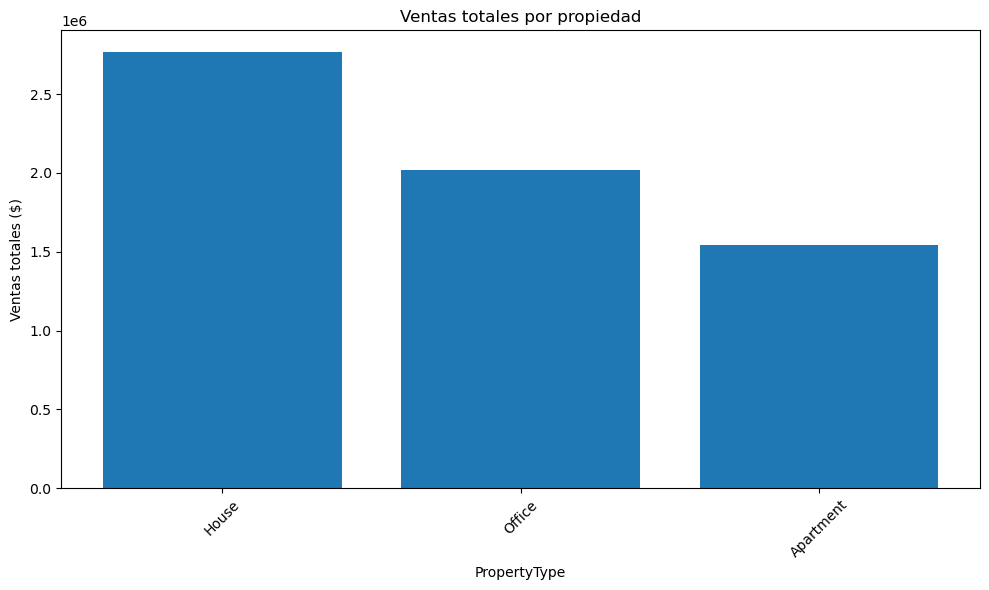

✅ Análisis completado correctamente


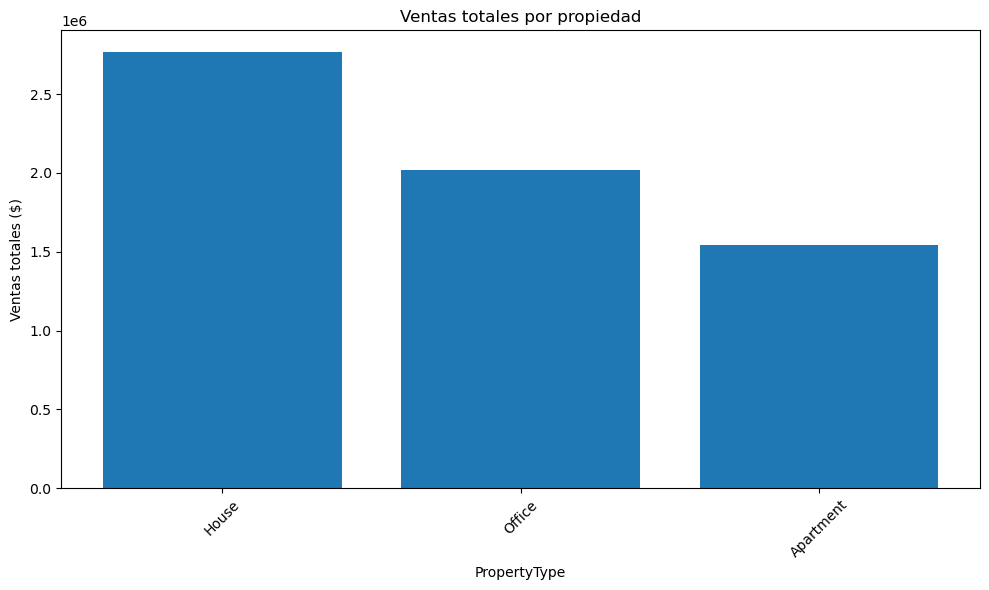

In [36]:
# Análisis básico de ventas
# Realizamos un análisis básico de las ventas por categoría de producto

query_analisis = """
SELECT 
    p.PropertyType,
    COUNT(*) AS num_ventas,
    SUM(s.SalePriceUSD) AS ventas_totales,
    AVG(s.SalePriceUSD) AS venta_promedio
FROM 
    fact_sales s
JOIN 
    dim_properties p ON s.PropertyID = p.PropertyID
GROUP BY 
    p.PropertyType
ORDER BY 
    ventas_totales DESC
"""

try:
    # Ejecutar la consulta de análisis
    resultado_analisis = spark.sql(query_analisis)
    
    # Mostrar los resultados
    print("Análisis de ventas por tipo de propiedad:")
    display(resultado_analisis)
    
    # Convertir a pandas para visualización
    df_analisis_pd = resultado_analisis.toPandas()
    
    # Visualizar con matplotlib (si está disponible)
    try:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(10, 6))
        plt.bar(df_analisis_pd['PropertyType'], df_analisis_pd['ventas_totales'])
        plt.title('Ventas totales por propiedad')
        plt.xlabel('PropertyType')
        plt.ylabel('Ventas totales ($)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        display(plt.gcf())
    except ImportError:
        print("Matplotlib no está disponible para visualización. Mostrando datos en formato tabular.")
        
    print("✅ Análisis completado correctamente")
except Exception as e:
    print(f"Error al ejecutar análisis: {str(e)}")

In [37]:
# Guardar el resultado del análisis
# Guardamos el resultado del análisis como archivo CSV

try:
    # Convertir a pandas para guardarlo como CSV
    df_analisis_pd.to_csv("/tmp/analisis_ventas_propiedad.csv", index=False)
    
    # Subir al lakehouse
    mssparkutils.fs.put("Files/processed/analisis_ventas_propiedad.csv", 
                        "/tmp/analisis_ventas_categoria.csv", True)
    
    print("✅ Resultado del análisis guardado como CSV en 'Files/processed/analisis_ventas_propiedad.csv'")
except Exception as e:
    print(f"Error al guardar resultado: {str(e)}")

StatementMeta(, 7642ace4-2389-4f5c-aa57-f9e7d4973349, 20, Finished, Available, Finished)

✅ Resultado del análisis guardado como CSV en 'Files/processed/analisis_ventas_propiedad.csv'
